In [2]:
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    intersection = np.sum(y_true_f * y_pred_f)
    
    return(2. * intersection + smooth) / (np.sum(y_true_f) + np.sum(y_pred_f) + smooth)


def IOU(y_true, y_pred):
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    intersection = np.sum(y_true_f * y_pred_f)
    union = np.sum(y_true_f) + np.sum(y_pred_f) - intersection
    
    return intersection/union

def dice_coef_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred, 1)

def specificity(y_true, y_pred):
    tn = np.sum(np.round(np.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fp = np.sum(np.round(np.clip((1 - y_true) * y_pred, 0, 1)))
    return tn / (tn + fp + np.finfo(float).eps)

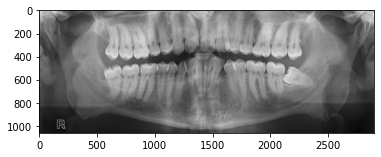

In [83]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../input/segmentation-of-teeth-panoramic-xray-images/Dataset/image/20.png',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

titles = ['Original Image','BINARY']
images = [img, thresh1]

plt.imshow(img, cmap='gray')

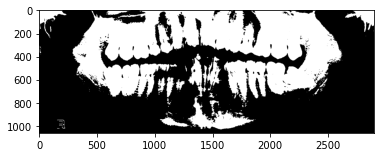

In [5]:
plt.imshow(thresh1, cmap='gray')

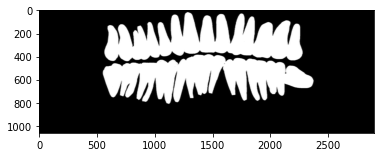

In [6]:
Y_test =cv2.imread('../input/segmentation-of-teeth-panoramic-xray-images/Dataset/label/20.png',0)
Y_test = cv2.resize(Y_test, (2900, 1060))
plt.imshow(Y_test, cmap='gray')

In [8]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
import numpy as np

predict_img1=(thresh1>0.25)*1
y_test1=(Y_test>0.25)*1

f1 = f1_score(predict_img1.flatten(), y_test1.flatten(), average='micro')

acc = accuracy_score(predict_img1.flatten(), y_test1.flatten())

pre = precision_score(predict_img1.flatten(), y_test1.flatten())

rec = recall_score(predict_img1.flatten(), y_test1.flatten())

dice = dice_coef(predict_img1, y_test1)

spe = specificity(predict_img1, y_test1)

iou = IOU(predict_img1, y_test1)

print("GLOBAL THRESHOLDING")
print(f"F1 Score = {f1}")
print(f"Accuracy = {acc}")
print(f"Precision = {pre}")
print(f"Recall = {rec}")
print(f"Dice Coeff = {dice}")
print(f"Specificity = {spe}")
print(f"IOU = {iou}")

GLOBAL THRESHOLDING
F1 Score = 0.7478083929733247
Accuracy = 0.7478083929733247
Precision = 0.7077855542792595
Recall = 0.6127060265421898
Dice Coeff = 0.6568229305002213
Specificity = 0.8356078582074773
IOU = 0.48900678787015905


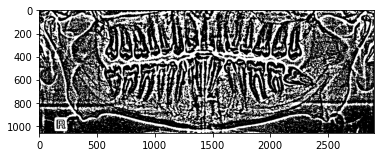

In [44]:
img_blur = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY_INV,45,2)
plt.imshow(th2, cmap='gray')

In [46]:
predict_img1=(th2>0.25)*1
y_test1=(Y_test>0.25)*1

f1 = f1_score(predict_img1.flatten(), y_test1.flatten(), average='micro')

acc = accuracy_score(predict_img1.flatten(), y_test1.flatten())

pre = precision_score(predict_img1.flatten(), y_test1.flatten())

rec = recall_score(predict_img1.flatten(), y_test1.flatten())

dice = dice_coef(predict_img1, y_test1)

spe = specificity(predict_img1, y_test1)

iou = IOU(predict_img1, y_test1)

print("ADAPTIVE THRESHOLDING")
print(f"F1 Score = {f1}")
print(f"Accuracy = {acc}")
print(f"Precision = {pre}")
print(f"Recall = {rec}")
print(f"Dice Coeff = {dice}")
print(f"Specificity = {spe}")
print(f"IOU = {iou}")

ADAPTIVE THRESHOLDING
F1 Score = 0.5476047495120364
Accuracy = 0.5476047495120364
Precision = 0.37716138191060244
Recall = 0.34887671634230566
Dice Coeff = 0.3624683907571732
Specificity = 0.6636307100655435
IOU = 0.22135025165272204


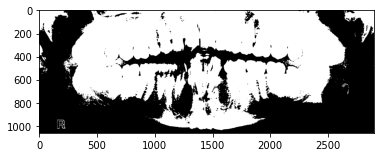

In [54]:
ret3,th3 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th3, cmap='gray')

In [55]:
predict_img1=(th3>0.25)*1
y_test1=(Y_test>0.25)*1

f1 = f1_score(predict_img1.flatten(), y_test1.flatten(), average='micro')

acc = accuracy_score(predict_img1.flatten(), y_test1.flatten())

pre = precision_score(predict_img1.flatten(), y_test1.flatten())

rec = recall_score(predict_img1.flatten(), y_test1.flatten())

dice = dice_coef(predict_img1, y_test1)

spe = specificity(predict_img1, y_test1)

iou = IOU(predict_img1, y_test1)

print("OTSU THRESHOLDING")
print(f"F1 Score = {f1}")
print(f"Accuracy = {acc}")
print(f"Precision = {pre}")
print(f"Recall = {rec}")
print(f"Dice Coeff = {dice}")
print(f"Specificity = {spe}")
print(f"IOU = {iou}")

OTSU THRESHOLDING
F1 Score = 0.6980058555627846
Accuracy = 0.6980058555627846
Precision = 0.8578906896959659
Recall = 0.5356971795409486
Dice Coeff = 0.6595489526966937
Specificity = 0.8932534427206953
IOU = 0.4920349517686823


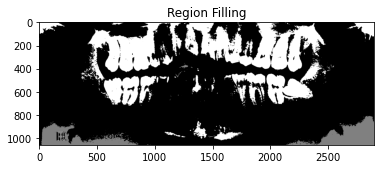

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import canny
from skimage import data,morphology
from skimage.color import rgb2gray
import scipy.ndimage as nd

plt.rcParams["figure.figsize"] = (12,8)
%matplotlib inline
 
# load images and convert grayscale
img = cv2.imread('../input/segmentation-of-teeth-panoramic-xray-images/Dataset/image/20.png')
img_wh = rgb2gray(img)
 
# apply edge segmentation
# plot canny edge detection
edges = canny(img_wh)
plt.imshow(edges, interpolation='gaussian')
plt.title('Canny detector')
 
# fill regions to perform edge segmentation
fill_im = nd.binary_fill_holes(edges)
plt.imshow(fill_im)
plt.title('Region Filling')
 
# Region Segmentation
# First we print the elevation map
elevation_map = nd.sobel(img_wh)
plt.imshow(elevation_map)
 
# Since, the contrast difference is not much. Anyways we will perform it
markers = np.zeros_like(img_wh)
markers[img_wh < 0.1171875] = 1 # 30/255
markers[img_wh > 0.5859375] = 2 # 150/255
 
plt.imshow(markers, 'gray')
 
# # Perform watershed region segmentation
# segmentation = skimage.segmentation(elevation_map, markers)
 
# plt.imshow(segmentation)
# plt.title('Watershed segmentation')
 
# # plot overlays and contour
# segmentation = nd.binary_fill_holes(segmentation - 1)
# label_rock, _ = nd.label(segmentation)
# # overlay image with different labels
# image_label_overlay = label2rgb(label_rock, image=rocket_wh)
 
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 16), sharey=True)
# ax1.imshow(img_wh)
# ax1.contour(segmentation, [0.8], linewidths=1.8, colors='w')
# ax2.imshow(image_label_overlay)
 
# fig.subplots_adjust(**margins)

In [91]:
predict_img1=(markers>0.25)*1
y_test1=(Y_test>0.25)*1

f1 = f1_score(predict_img1.flatten(), y_test1.flatten(), average='micro')

acc = accuracy_score(predict_img1.flatten(), y_test1.flatten())

pre = precision_score(predict_img1.flatten(), y_test1.flatten())

rec = recall_score(predict_img1.flatten(), y_test1.flatten())

dice = dice_coef(predict_img1, y_test1)

spe = specificity(predict_img1, y_test1)

iou = IOU(predict_img1, y_test1)

print("REGION BASED")
print(f"F1 Score = {f1}")
print(f"Accuracy = {acc}")
print(f"Precision = {pre}")
print(f"Recall = {rec}")
print(f"Dice Coeff = {dice}")
print(f"Specificity = {spe}")
print(f"IOU = {iou}")

REGION BASED
F1 Score = 0.71639492517892
Accuracy = 0.71639492517892
Precision = 0.4787324981014566
Recall = 0.6066043050320472
Dice Coeff = 0.5351358729992839
Specificity = 0.7568175283583365
IOU = 0.3653141098255965


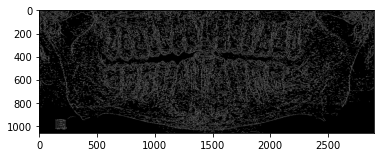

In [116]:
import cv2
img = cv2.imread('../input/segmentation-of-teeth-panoramic-xray-images/Dataset/image/20.png', 0)
edge = cv2.Canny(img, 20, 30)
plt.imshow(edge, 'gray')

In [117]:
predict_img1=(edge>0.25)*1
y_test1=(Y_test>0.25)*1

f1 = f1_score(predict_img1.flatten(), y_test1.flatten(), average='micro')

acc = accuracy_score(predict_img1.flatten(), y_test1.flatten())

pre = precision_score(predict_img1.flatten(), y_test1.flatten())

rec = recall_score(predict_img1.flatten(), y_test1.flatten())

dice = dice_coef(predict_img1, y_test1)

spe = specificity(predict_img1, y_test1)

iou = IOU(predict_img1, y_test1)

print("CANNY EDGE")
print(f"F1 Score = {f1}")
print(f"Accuracy = {acc}")
print(f"Precision = {pre}")
print(f"Recall = {rec}")
print(f"Dice Coeff = {dice}")
print(f"Specificity = {spe}")
print(f"IOU = {iou}")

CANNY EDGE
F1 Score = 0.6600022771633052
Accuracy = 0.6600022771633052
Precision = 0.13271199764924077
Recall = 0.5054852811320137
Dice Coeff = 0.21023014076248106
Specificity = 0.6751950561828264
IOU = 0.11746173553397993
